In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Standard library imports.

# Related third party imports.
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import normalize

# Local application/library specific imports.
from src.visualization.visualize import standard_layout, draw_network


In [5]:
all_counts = np.zeros(shape=(25,))
for i in range(2,26):
    R = np.fromfile(f'../data/processed/requests/25_italy/25_italy.{i}.subgraphs', dtype=int, sep=' ')
    nodes, counts = np.unique(R, return_counts=True)
    density = counts/sum(counts)
    all_counts += counts
all_density = all_counts / sum(all_counts)

In [17]:
for i,d in zip(range(25),all_density):
    print(f'{i},{d:.3f}')

0,0.049
1,0.046
2,0.040
3,0.033
4,0.033
5,0.038
6,0.046
7,0.041
8,0.056
9,0.046
10,0.034
11,0.030
12,0.040
13,0.031
14,0.040
15,0.056
16,0.038
17,0.037
18,0.049
19,0.034
20,0.048
21,0.037
22,0.038
23,0.019
24,0.041


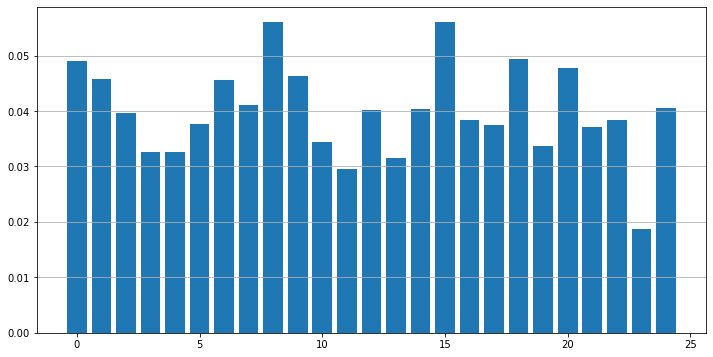

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(nodes, all_density);
ax.grid(axis='y')

In [20]:
R10 = np.fromfile('../data/processed/requests/25_italy/25_italy.10.subgraphs', dtype=int, sep=' ')
nodes10, counts10 = np.unique(R10, return_counts=True)
density10 = counts10/sum(counts10)

In [34]:
R4 = np.fromfile('../data/processed/requests/25_italy/25_italy.4.subgraphs', dtype=int, sep=' ')
nodes4, counts4 = np.unique(R4, return_counts=True)
density4 = counts4/sum(counts4)

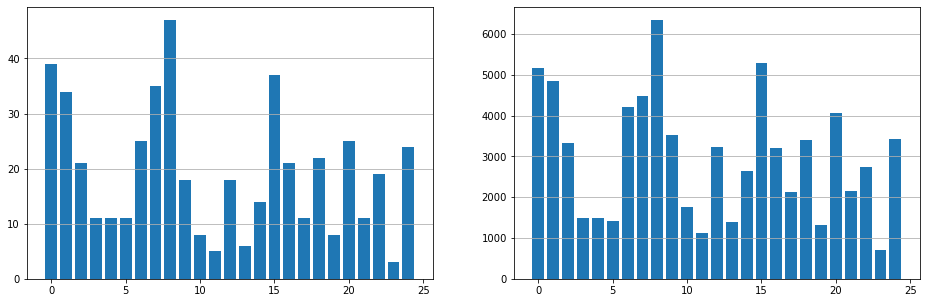

In [26]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

ax[0].bar(nodes4, counts4);
ax[0].grid(axis='y')

ax[1].bar(nodes10, counts10);
ax[1].grid(axis='y')

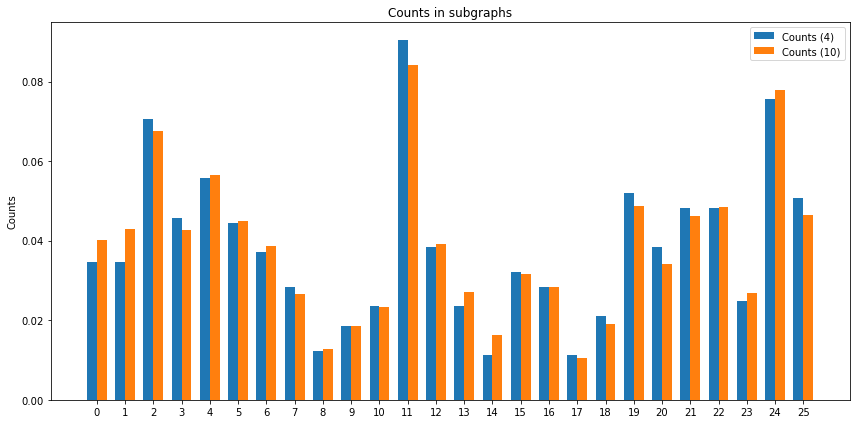

In [34]:
# Compare node usage distributions
network = '26_usa'

R = np.fromfile(f'../data/processed/requests/{network}/{network}.4.subgraphs', dtype=int, sep=' ')
nodes, counts4 = np.unique(R, return_counts=True)
density4 = counts4/len(R)
R = np.fromfile(f'../data/processed/requests/{network}/{network}.10.subgraphs', dtype=int, sep=' ')
_, counts10 = np.unique(R, return_counts=True)
density10 = counts10/len(R)


x = np.arange(len(nodes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, density4, width, label='Counts (4)')
rects2 = ax.bar(x + width/2, density10, width, label='Counts (10)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts in subgraphs')
ax.set_xticks(x)
ax.set_xticklabels(nodes)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

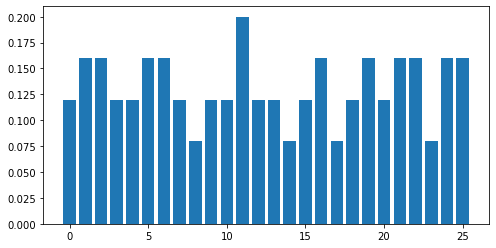

In [4]:
# Degree centrality
network = '26_usa'
g = nx.read_gml(path=f'../data/processed/networks/{network}.gml', label='id')
dc = nx.degree_centrality(g)

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(dc.keys(), dc.values());

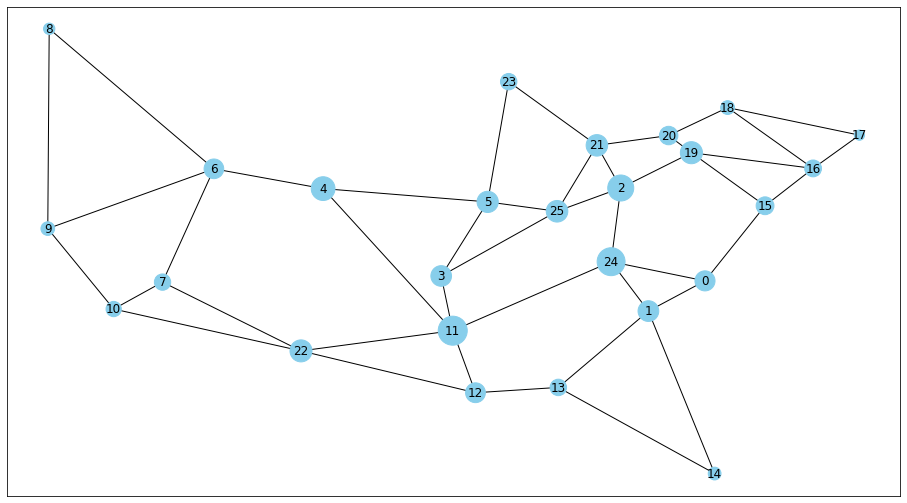

In [39]:
draw_network(g, **{'node_size':density10*10000})

25